In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [3]:
mpg_df = pd.read_csv("car-mpg.csv")
# drop the car name column as it is useless for the model
car_name = mpg_df['car_name']
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [4]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')  

In [8]:
mpg_z = mpg_df.apply(zscore)
mpg_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,-1.062235
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,-1.062235
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,-1.062235
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,-1.062235
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,-1.062235


In [9]:
modelPCA = PCA()
modelPCA.fit(mpg_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
modelPCA.explained_variance_

array([6.12604262, 0.98808618, 0.82067292, 0.50966905, 0.26738488,
       0.17223798, 0.0615883 , 0.04627683, 0.03071126])

In [15]:
modelPCA.explained_variance_ratio_

array([0.67896117, 0.10951151, 0.09095677, 0.05648761, 0.02963478,
       0.01908947, 0.00682595, 0.00512895, 0.00340379])

In [18]:
X = mpg_df[mpg_df.columns[1:-1]]
y = mpg_df["mpg"]
X_z = X.apply(zscore)

In [19]:
modelPCA = PCA()
modelPCA.fit(X_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
modelPCA.explained_variance_

array([4.61375285, 0.94263114, 0.75056808, 0.48239402, 0.13258963,
       0.06201432, 0.0336822 ])

In [21]:
modelPCA.explained_variance_ratio_

array([0.6574515 , 0.13432325, 0.1069546 , 0.06874028, 0.01889378,
       0.00883693, 0.00479965])

In [27]:
import itertools 
import operator

In [31]:
cumilative=list(itertools.accumulate(modelPCA.explained_variance_ratio_,operator.add))

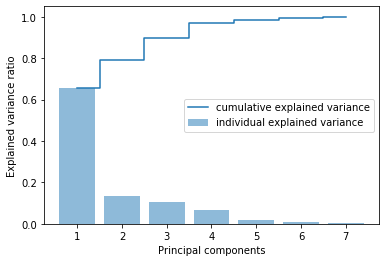

In [33]:
plt.bar(range(1,8), modelPCA.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cumilative, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()